In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import Dataset, Reader, NormalPredictor, KNNBasic, KNNWithZScore, KNNWithMeans, KNNWithZScore, SVD
from surprise.model_selection import train_test_split, cross_validate
from collections import defaultdict
from surprise import accuracy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
pip install community 

Note: you may need to restart the kernel to use updated packages.


In [4]:
df_review = pd.read_csv("yelp_academic_dataset_review.csv")
df_review = pd.DataFrame(df_review)

In [5]:
df_business = pd.read_csv("yelp_academic_dataset_business.csv")
df_business = pd.DataFrame(df_business)

In [6]:
df_user = pd.read_csv("yelp_academic_dataset_user.csv")
df_user = pd.DataFrame(df_user)

C:\Users\asus\AppData\Local\Temp\ipykernel_19048\1230748970.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_user = pd.read_csv("yelp_academic_dataset_user.csv")


In [7]:
df_user.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


In [8]:
pip install pandas networkx matplotlib


VAMOS CRIAR UMA COMUNIDADE DE USERS COM BASE NOS AMIGOS DELES :)))

In [10]:
pip install python-louvain

In [11]:
import networkx as nx
import pandas as pd
from community import community_louvain
import matplotlib.pyplot as plt

C:\Users\asus\AppData\Local\Temp\ipykernel_19048\1184503777.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['relevant_categories'] = df_restaurants['categories'].apply(


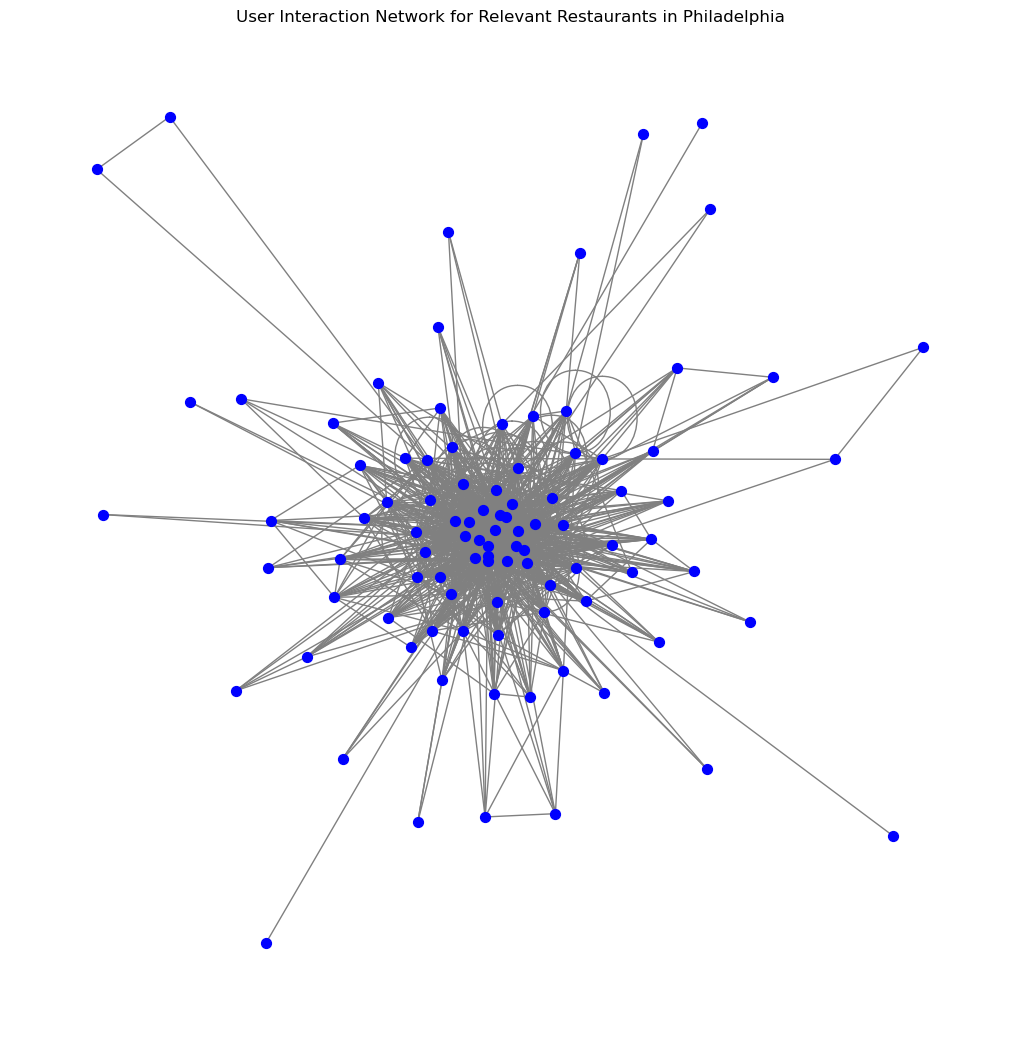

Number of nodes (users): 96
Number of edges (interactions): 1145


In [15]:
# Define relevant categories
relevant_categories = {
    'American (Traditional)', 'Italian', 'Mexican', 'Chinese', 'Indian', 
    'Japanese', 'Cafes', 'Bakeries', 'Mediterranean', 'Fast Food', 
    'Buffets', 'Food Trucks', 'Bars', 'Pubs', 'Steakhouses', 'Sushi Bars', 
    'Breakfast & Brunch', 'Sandwiches', 'Pizza', 'Seafood', 
    'Cocktail Bars', 'Ice Cream & Frozen Yogurt', 'Coffee & Tea', 
    'Desserts', 'Barbeque', 'Food Stands', 'Homemade', 'Street Food', 'Bistro', 
    'Sustainable Restaurants'
}

df_restaurants = df_business[
    (df_business['city'] == 'Philadelphia') & 
    (df_business['categories'].str.contains('Restaurants', na=False))
]

df_restaurants['relevant_categories'] = df_restaurants['categories'].apply(
    lambda x: [cat for cat in x.split(', ') if cat in relevant_categories]
)

df_restaurants = df_restaurants[df_restaurants['relevant_categories'].str.len() > 0]

df_filtered_reviews = pd.merge(df_review, df_restaurants, on='business_id', how='inner')

# Limit 
first_users = df_filtered_reviews['user_id'].unique()[:100]
df_filtered_reviews = df_filtered_reviews[df_filtered_reviews['user_id'].isin(first_users)]

G = nx.Graph()

for business_id, group in df_filtered_reviews.groupby('business_id'):
    users = group['user_id'].tolist()
    # Add edges between users who reviewed the same business using combinations
    for user1, user2 in combinations(users, 2):
        if G.has_edge(user1, user2):
            G[user1][user2]['weight'] += 1
        else:
            G.add_edge(user1, user2, weight=1)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1)  # Force-directed layout
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue', edge_color='gray')
plt.title("User Interaction Network for Relevant Restaurants in Philadelphia")
plt.show()

print("Number of nodes (users):", G.number_of_nodes())
print("Number of edges (interactions):", G.number_of_edges())

Let's add the names of the people in the plot

C:\Users\asus\AppData\Local\Temp\ipykernel_20888\2754700541.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['relevant_categories'] = df_restaurants['categories'].apply(


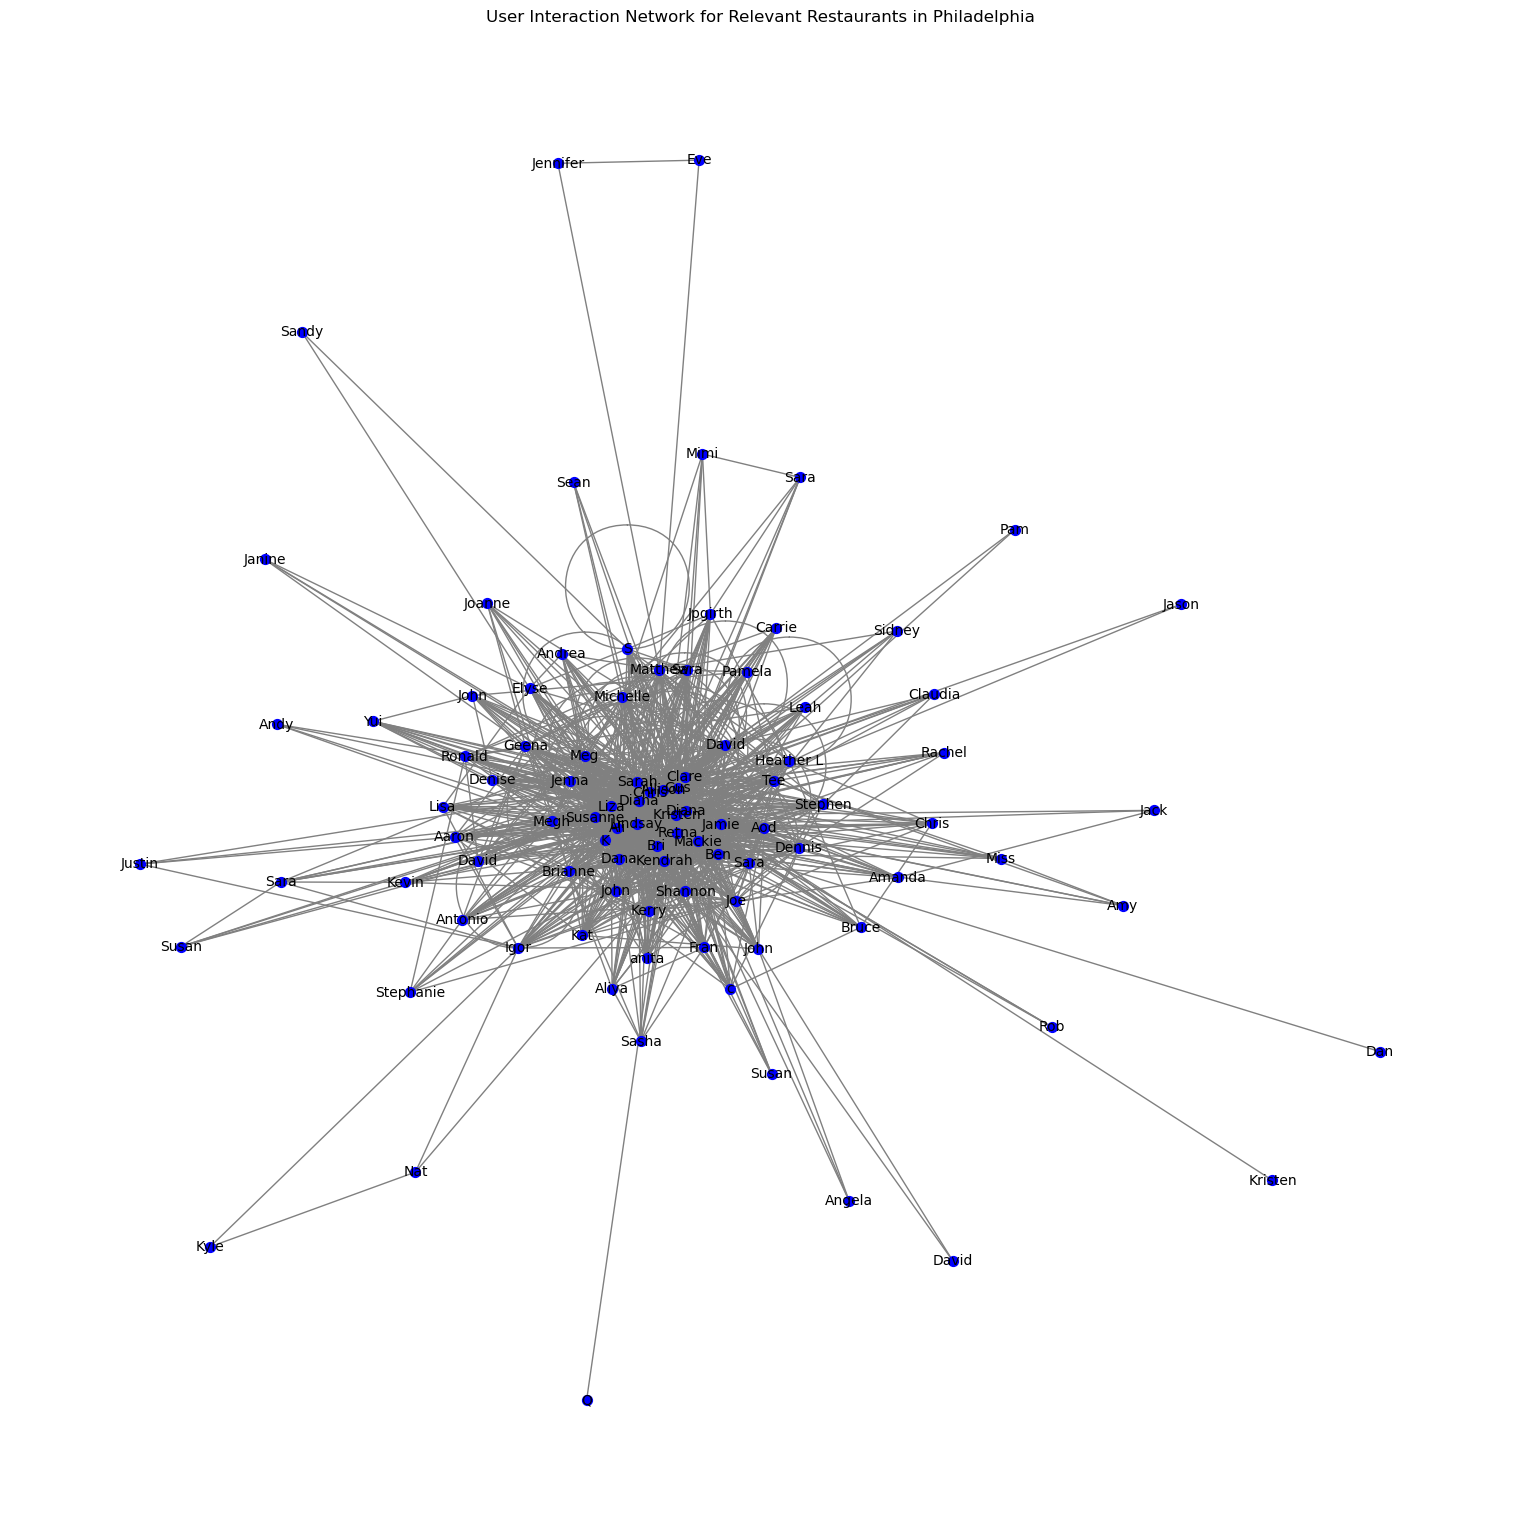

Number of nodes (users): 96
Number of edges (interactions): 1145


In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

relevant_categories = {
    'American (Traditional)', 'Italian', 'Mexican', 'Chinese', 'Indian', 
    'Japanese', 'Cafes', 'Bakeries', 'Mediterranean', 'Fast Food', 
    'Buffets', 'Food Trucks', 'Bars', 'Pubs', 'Steakhouses', 'Sushi Bars', 
    'Breakfast & Brunch', 'Sandwiches', 'Pizza', 'Seafood', 
    'Cocktail Bars', 'Ice Cream & Frozen Yogurt', 'Coffee & Tea', 
    'Desserts', 'Barbeque', 'Food Stands', 'Homemade', 'Street Food', 'Bistro', 
    'Sustainable Restaurants'
}

df_restaurants = df_business[ 
    (df_business['city'] == 'Philadelphia') & 
    (df_business['categories'].str.contains('Restaurants', na=False))
]

df_restaurants['relevant_categories'] = df_restaurants['categories'].apply(
    lambda x: [cat for cat in x.split(', ') if cat in relevant_categories]
)

df_restaurants = df_restaurants[df_restaurants['relevant_categories'].str.len() > 0]

df_filtered_reviews = pd.merge(df_review, df_restaurants, on='business_id', how='inner')

first_five_users = df_filtered_reviews['user_id'].unique()[:100]
df_filtered_reviews = df_filtered_reviews[df_filtered_reviews['user_id'].isin(first_five_users)]

G = nx.Graph()

for business_id, group in df_filtered_reviews.groupby('business_id'):
    users = group['user_id'].tolist()
    # Add edges between users who reviewed the same business using combinations
    for user1, user2 in combinations(users, 2):
        if G.has_edge(user1, user2):
            G[user1][user2]['weight'] += 1
        else:
            G.add_edge(user1, user2, weight=1)

df_user_subset = df_user[df_user['user_id'].isin(G.nodes)]
user_names = df_user_subset.set_index('user_id')['name'].to_dict()

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.1)  # Force-directed layout
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue', edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, labels=user_names, font_size=10)

plt.title("User Interaction Network for Relevant Restaurants in Philadelphia")
plt.show()

print("Number of nodes (users):", G.number_of_nodes())
print("Number of edges (interactions):", G.number_of_edges())



Same but using the same style from the plot of the business

Detected Communities:
Community 1: {'LqC5hNXcFVY-jcbyxi-tuQ', 'ndgHYecgAWEqtjnjE7LtfA', 'be1dU739NLAFbLw2S4RPhA', 'zg2FNzIq6s7n41H1E5NnWg', 'JDBlafv8p0UBtVFZ4LnRhw', '7HOTNEzVwtJQK6iwC6XVJA', 'JggphOM7FIbvUyPcsfcNTw', 'xjQSpme1Z7Xw8XehRLpYuA', 'bqmbKKNZnutdZuvzxifTBA', '9oHOoqk-HlwDS2DlHLi_0g', 'au30JemWvCjjTp5vWdOLow', 'cARxOd_5yKCgsCbUZ5ED4Q', 'A9Q-_QpJy1mHjlwwP2RwJg', '7PzSDwOmU6wQd9aKX3-NRg', 'j6auVeGydK6FavvcyHu_Zw', 'boC2VXdYY0bs4vOw_jD4bQ', 'vFd8aBLg1kFcd0kCkoi-xw', 'xE7AXFF9wVaN6id6OCtH3Q', 'XTWdXSOoUJnIMiVSA-1gDg', 'RhqQNwLWCHArpTwhlaiM9A', 'uAu772KpSkb-tPFgZmU-lA', '5kcLlhJPLJL_GLwrAdbZAA', 'ZINyxsYek_RF6jrUmQ_zDw', 'kSMOJwJXuEUqzfmuFncK4A', 'Xj4NPAq2efs4mzS4kFHGyQ', 'wABHp4fGUC-0acRKhmQO2A', 'JW5W4OZCohTvZlRF1jzrTg', 'M-00xuAOYLeaGEhPmmKjfg', '1M1HMZO1_TuTS5tQbHKIgg', 'hWDybu_KvYLSdEFzGrniTw', 'dme9K6sQrgpojAay5r8IAA', '2XBcnIVhp_pEeer-asuxHA', '2DOVDCbzd2X1cxs0YeFdrg', 'mzXDuhZBPdHfMIk1YXP0mQ', 'Au2RZKzmrr75h2bBpb60oA', 'LcVPBNUeENzPlXNbZ2jTQw', 'IQsF3Rc6IgCzjVV9DE8KXg', 's

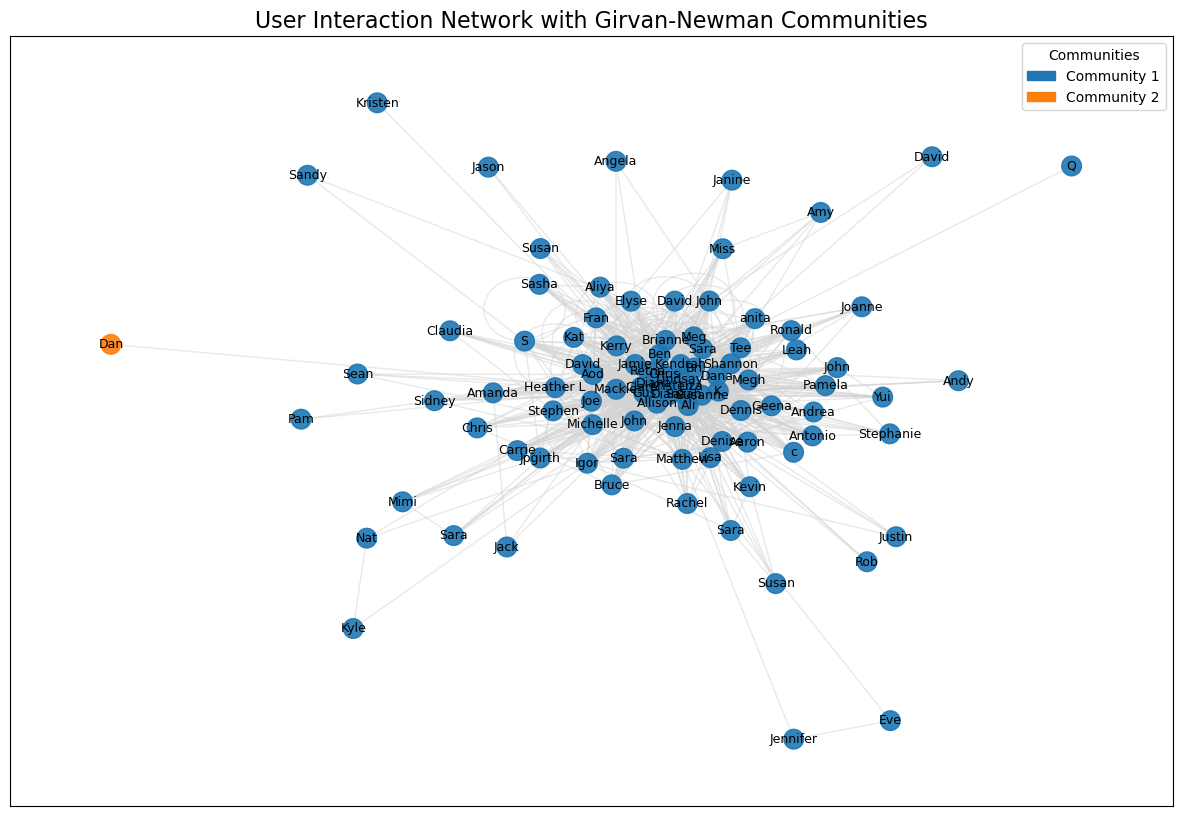

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming you have already created the user interaction network `G`
# Using the Girvan-Newman algorithm to detect communities
communities_generator = nx.community.girvan_newman(G)
first_community = next(communities_generator)  # Get the first set of communities
first_community = list(first_community)  # Convert to list format

# Print out the detected communities
print("Detected Communities:")
for i, community in enumerate(first_community):
    print(f"Community {i + 1}: {community}")

# Visualize the user interaction network with detected communities
plt.figure(figsize=(15, 10))

# Define distinct colors for communities
community_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Map nodes to community colors
color_map = {}
for idx, community in enumerate(first_community):
    for node in community:
        color_map[node] = community_colors[idx % len(community_colors)]  # Cycle through colors

# Get positions for nodes using spring layout
pos = nx.spring_layout(G, k=0.15, seed=42)  # Adjust k for spacing and seed for reproducibility

# Draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_color=[color_map[node] for node in G.nodes()], node_size=200, alpha=0.9)

# Draw edges with a consistent color and transparency
nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1, alpha=0.5)
df_user_subset = df_user[df_user['user_id'].isin(G.nodes)]
user_names = df_user_subset.set_index('user_id')['name'].to_dict()
# Draw labels using the `user_names` dictionary
nx.draw_networkx_labels(G, pos, labels=user_names, font_size=9, font_color='black')

# Title and layout
plt.title('User Interaction Network with Girvan-Newman Communities', fontsize=16)

# Create a legend for the communities
handles = []
for idx, community in enumerate(first_community):
    patch = mpatches.Patch(color=community_colors[idx % len(community_colors)], label=f'Community {idx + 1}')
    handles.append(patch)

# Display the legend
plt.legend(handles=handles, loc='best', title="Communities", fontsize=10)

# Show the final plot
plt.show()


Again, Newman method is not good, so let's use the same used in Business